<a href="https://colab.research.google.com/github/fedhere/PUS2022_FBianco/blob/main/classdemo/morans_i_segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas
!pip install census

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install us

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd

In [4]:
import geopandas as gpd
import matplotlib.pylab as plt

In [5]:
from census  import Census
from us import states

In [38]:
from pysal.lib import weights
from pysal.explore import esda

In [97]:
import numpy as np
import seaborn

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
pwd

'/content'

In [8]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [9]:
ls

'000_0027_Emille_Ishida-e1535476162261 (1).png'
 00101.mov
 00102.mov
 00103.mov
 00104.mov
 10.5334_dsj-2015-011_T1.csv
 10.5334_dsj-2015-011_T1.gsheet
'109197-25 Non-Final OA.zip'
 11bov.pdf
'11fe summary.gdoc'
 11img-179017.png
'1 2017 Proposal Award Information Form & Guidelines.pdf'
 2003VS2.png
 2013Jul15_obslog_0327.log
 2018-07-17_SC.pdf
'2018 Capstone assignments FINAL.XLSX'
'2018 Capstone assignments - worksheets.xlsx'
'2018 Capstone assignments - worksheets.xlsx.gsheet'
 2021-04-22T2051_Grades-21S-PHYS207-013.csv
'2021-23 - DrlicaWager_Enabling_Science_Proposal_2021.gdoc'
'2021-23 - DrlicaWager_Enabling_Science_Proposal_2021.pdf'
'2021 SSSC Working Group Leads Nomination Form (Responses).gsheet'
 20220510_154017.jpg
 2022-06-01T0052_Grades-22S-PHYS667-010.csv
 2022-06-01T0052_Grades-22S-PHYS667-010.gsheet
'21A00327_OAD Grant Agreement_Bianco.docx'
'2 2017 Final Report and Financial Attestation Forms.pdf'
'3 2017 Financial Report Template.xlsx'
'4 Form W-9.pdf'
 5.25.pdf
 8:0

In [10]:
ls censusapi.txt


censusapi.txt*


In [11]:
!chmod 700 censusapi.txt

In [12]:
f = open("censusapi.txt", "r")
APIkey = f.readlines()[0].strip()

In [13]:
with open('censusapi.txt', "r") as f:
  c = Census(f.read().replace("\n", ""))

In [14]:
chicago_by_race = pd.DataFrame(c.acs5.state_county_tract(fields=("NAME", "B02001_001E"),
                          state_fips = states.IL.fips,
                          county_fips = '031',
                          tract = "*", year=2019)).merge(
                  pd.DataFrame(c.acs5.state_county_tract(fields=("NAME", "B02001_003E"),
                          state_fips = states.IL.fips,
                          county_fips = '031',
                          tract = "*", year=2019)))
chicago_by_race

,NAME,B02001_001E,state,county,tract,B02001_003E
0,"Census Tract 6302, Cook County, Illinois",1825.0,17,031,630200,0.0
1,"Census Tract 5807, Cook County, Illinois",5908.0,17,031,580700,396.0
2,"Census Tract 5906, Cook County, Illinois",3419.0,17,031,590600,19.0
3,"Census Tract 6007, Cook County, Illinois",2835.0,17,031,600700,82.0
4,"Census Tract 6119, Cook County, Illinois",1639.0,17,031,611900,1181.0
...,...,...,...,...,...,...
1314,"Census Tract 4401.01, Cook County, Illinois",4088.0,17,031,440101,3966.0
1315,"Census Tract 4401.02, Cook County, Illinois",3473.0,17,031,440102,3153.0
1316,"Census Tract 4402.02, Cook County, Illinois",3012.0,17,031,440202,2913.0
1317,"Census Tract 4603.01, Cook County, Illinois",3634.0,17,031,460301,2560.0


In [16]:
chicago_by_race["bkfraction"] = chicago_by_race["B02001_003E"] / chicago_by_race["B02001_001E"]
chicago_by_race.head(2)

,NAME,B02001_001E,state,county,tract,B02001_003E,bkfraction
0,"Census Tract 6302, Cook County, Illinois",1825.0,17,031,630200,0.0,0.000000
1,"Census Tract 5807, Cook County, Illinois",5908.0,17,031,580700,396.0,0.067028


In [17]:
pwd

'/content/drive/MyDrive'

In [18]:
cd ../Shareddrives/PUS2022/

/content/drive/Shareddrives/PUS2022


In [19]:
ls

 censusapi.txt
 data/
'Heat Vulnerability PUS Midterm Project Proposal Template (1).gdoc'
'Heat Vulnerability PUS Midterm Project Proposal Template.gdoc'
'PUS2022 proposal slide deck.gslides'
'PUS Final Project Template.gdoc'
'PUS Midterm Project Proposal .gdoc'
'PUS Midterm Project Proposal Template.gdoc'
 tl_2019_17_tract/
'Wolk Latham PUS Midterm Project Proposal Written.gdoc'


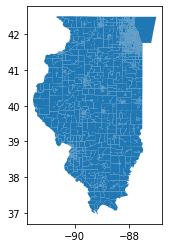

In [21]:
ilct2019 = gpd.GeoDataFrame.from_file("tl_2019_17_tract/tl_2019_17_tract.shp")
ilct2019.plot()

In [22]:
ilct2019.head(3)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.88768 41.13594, -87.88764 41.136..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1791332,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89410 41.14388, -87.89400 41.143..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5169973,169066,+38.7277628,-090.1002620,"POLYGON ((-90.11192 38.70281, -90.11128 38.703..."


In [24]:
ilct2019.shape

(3123, 13)

In [25]:
chicago_by_race.shape

(1319, 7)

In [26]:
chicago_by_race = ilct2019.merge(chicago_by_race, left_on=["STATEFP",	"COUNTYFP","TRACTCE"], right_on=["state","county","tract"])
chicago_by_race.shape

(1319, 20)

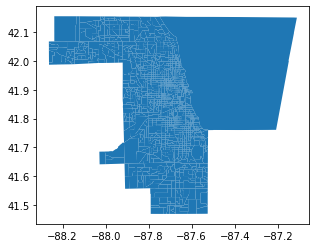

In [27]:
chicago_by_race.plot()

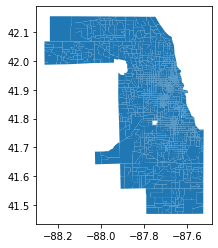

In [30]:
chicago_by_race[chicago_by_race["B02001_001E"] > 0].plot()

In [31]:
chicago_by_race = chicago_by_race[chicago_by_race["B02001_001E"] > 0]

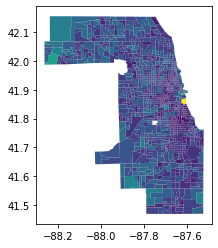

In [32]:
chicago_by_race.plot("B02001_001E")

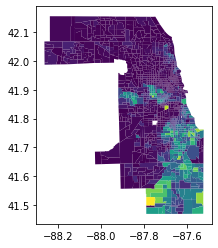

In [33]:
chicago_by_race.plot("B02001_003E")

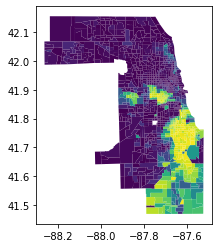

In [34]:
chicago_by_race.plot("bkfraction")

In [35]:
chicago_by_race.shape

(1315, 20)

In [40]:
w = weights.distance.KNN.from_dataframe(chicago_by_race, k=8)

In [41]:
w.transform = 'R'

In [43]:
chicago_by_race["w_lag_bk"] = weights.spatial_lag.lag_spatial(w, chicago_by_race["bkfraction"])

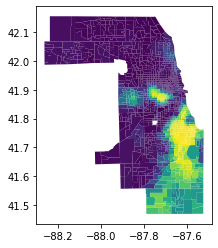

In [44]:
chicago_by_race.plot("w_lag_bk")

In [69]:
chicago_by_race["bkfraction"].sample(frac=1).values

array([0.66937041, 0.8951189 , 0.01869547, ..., 0.00801068, 0.03024748,
       0.75354312])

In [72]:
np.random.seed(457)
for i in range(5):
  chicago_by_race["bkfraction_{}".format(i)] = chicago_by_race["bkfraction"].sample(frac=1).values
  

In [73]:
chicago_by_race.head(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,county,tract,B02001_003E,bkfraction,w_lag_bk,bkfraction_0,bkfraction_1,bkfraction_2,bkfraction_3,bkfraction_4
0,17,031,010300,17031010300,103,Census Tract 103,G5020,S,472017,0,...,031,010300,2007.0,0.309483,0.284394,0.398974,0.014608,0.035484,0.669370,0.159681
1,17,031,010400,17031010400,104,Census Tract 104,G5020,S,548761,602605,...,031,010400,1111.0,0.213121,0.182818,0.004244,0.944409,0.905413,0.895119,0.003153


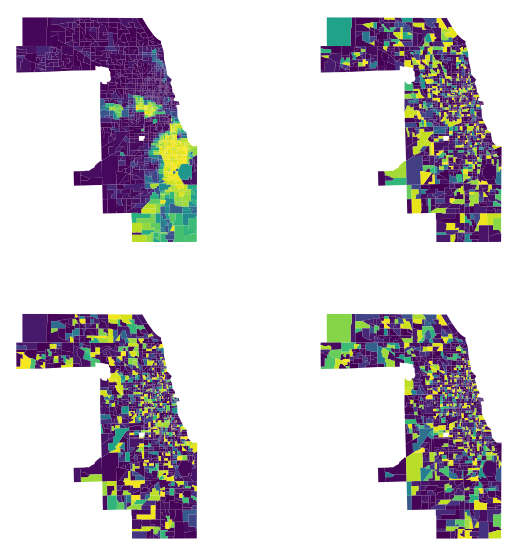

In [76]:
f = plt.figure(figsize = (10,10))
ax = f.add_subplot(2, 2, 1)
chicago_by_race.plot("bkfraction", ax=ax)
ax.axis('off')
for i in range(0, 3):
  ax = f.add_subplot(2, 2, i+2)
  chicago_by_race.plot("bkfraction_{}".format(i), ax=ax)
  ax.axis('off')

In [79]:
chicago_by_race["bkfraction_{}".format(i)].std()

0.3634136258691545

In [89]:
chicago_by_race["bkfraction_st"] = ((chicago_by_race["bkfraction"] - chicago_by_race["bkfraction"].mean()) /
                                                chicago_by_race["bkfraction"].std())

In [90]:
for i in range(5):
  chicago_by_race["bkfraction_{}_st".format(i)] = ((chicago_by_race["bkfraction_{}".format(i)] - 
                                                    chicago_by_race["bkfraction_{}".format(i)].mean()) /
                                                chicago_by_race["bkfraction_{}".format(i)].std())

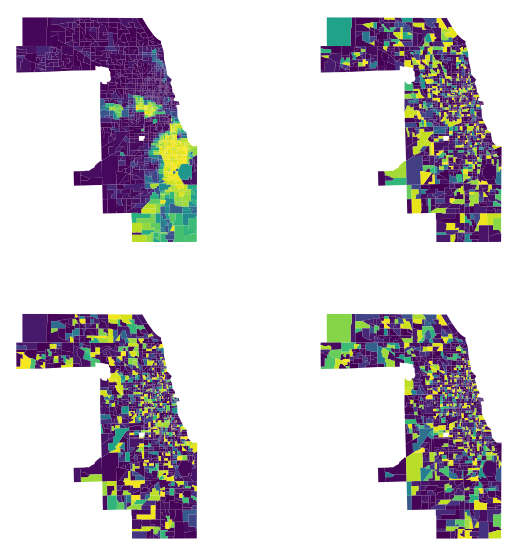

In [92]:
f = plt.figure(figsize = (10,10))
ax = f.add_subplot(2, 2, 1)
chicago_by_race.plot("bkfraction_st", ax=ax)
ax.axis('off')
for i in range(0, 3):
  ax = f.add_subplot(2, 2, i+2)
  chicago_by_race.plot("bkfraction_{}_st".format(i), ax=ax)
  ax.axis('off')

In [95]:
chicago_by_race["w_lag_bk_st"] = ((chicago_by_race["w_lag_bk"] - chicago_by_race["w_lag_bk"].mean()) /
                               chicago_by_race["w_lag_bk"].std())
for i in range(5):
  
  chicago_by_race["w_lag_bk_{}".format(i)] = weights.spatial_lag.lag_spatial(w, chicago_by_race["bkfraction_{}".format(i)])
  chicago_by_race["w_lag_bk_{}_st".format(i)] = ((chicago_by_race["w_lag_bk_{}".format(i)] - 
                                                    chicago_by_race["w_lag_bk_{}".format(i)].mean()) /
                                                chicago_by_race["w_lag_bk_{}".format(i)].std())

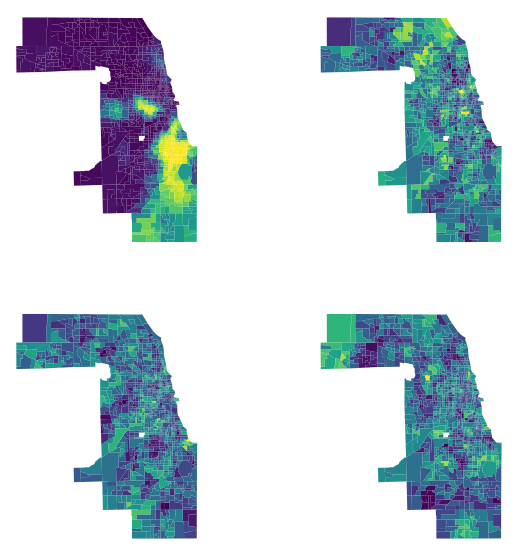

In [96]:
f = plt.figure(figsize = (10,10))
ax = f.add_subplot(2, 2, 1)
chicago_by_race.plot("w_lag_bk_st", ax=ax)
ax.axis('off')
for i in range(0, 3):
  ax = f.add_subplot(2, 2, i+2)
  chicago_by_race.plot("w_lag_bk_{}_st".format(i), ax=ax)
  ax.axis('off')

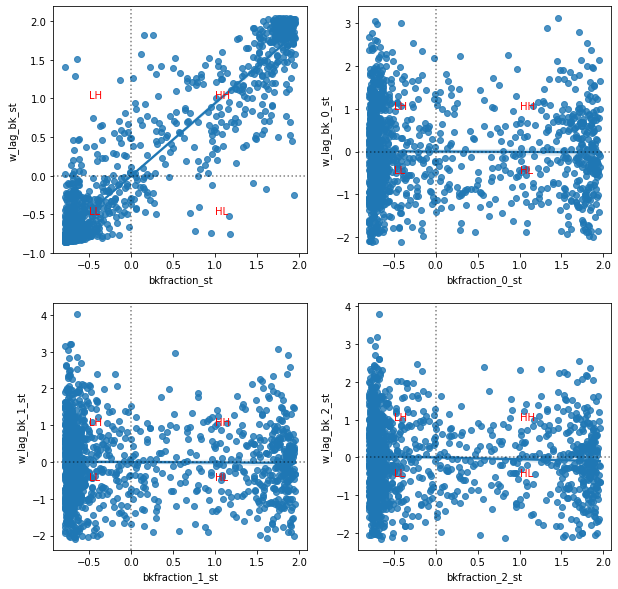

In [108]:
f = plt.figure(figsize = (10,10))
ax = f.add_subplot(2, 2, 1)
seaborn.regplot(x="bkfraction_st", y="w_lag_bk_st", data=chicago_by_race, ax=ax)

plt.axvline(0, c='k', alpha=0.5, linestyle=":")
plt.axhline(0, c='k', alpha=0.5, linestyle=":")
plt.text(1, 1, "HH", color="r")
plt.text(-0.5, 1, "LH", color="r")
plt.text(1, -0.5, "HL", color="r")
plt.text(-0.5, -0.5, "LL", color="r");
for i in range(3):
  ax = f.add_subplot(2, 2, i+2)
  seaborn.regplot(x="bkfraction_{}_st".format(i), y="w_lag_bk_{}_st".format(i), 
                  data=chicago_by_race, ax=ax)
  plt.axvline(0, c='k', alpha=0.5, linestyle=":")
  plt.axhline(0, c='k', alpha=0.5, linestyle=":")
  plt.text(1, 1, "HH", color="r")
  plt.text(-0.5, 1, "LH", color="r")
  plt.text(1, -0.5, "HL", color="r")
  plt.text(-0.5, -0.5, "LL", color="r");


In [110]:
lisa = esda.moran.Moran_Local(chicago_by_race["bkfraction"], w)
lisa

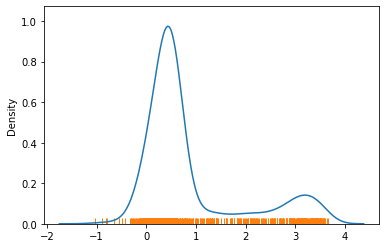

In [118]:
ax = seaborn.kdeplot(lisa.Is);
seaborn.rugplot(lisa.Is, ax=ax);

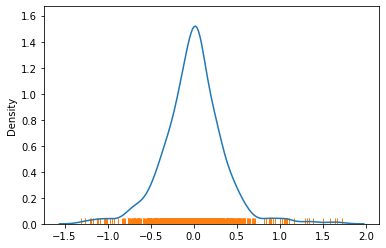

In [119]:
lisa_rand = esda.moran.Moran_Local(chicago_by_race["bkfraction_{}".format(0)], w)
lisa_rand
ax = seaborn.kdeplot(lisa_rand.Is);
seaborn.rugplot(lisa_rand.Is, ax=ax);

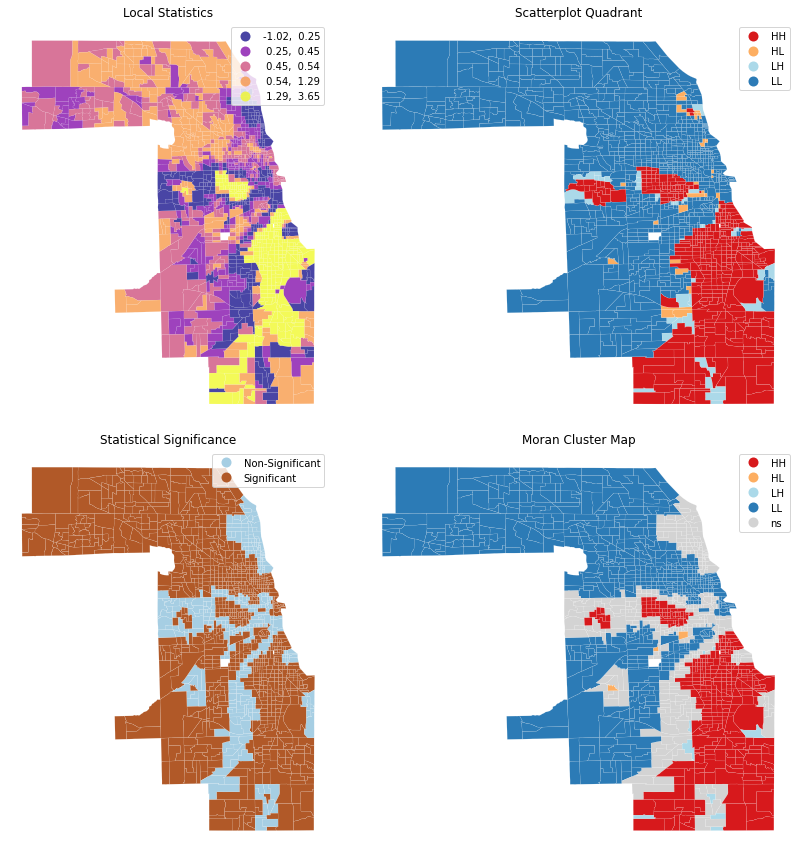

In [120]:
from splot import esda as esdaplot
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
chicago_by_race.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
  ).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
  )

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, chicago_by_race, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=chicago_by_race.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
     ).map({1: "Significant", 0: "Non-Significant"})
    # Assign labels to `db` on the fly
chicago_by_race.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
  ).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
  )


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, chicago_by_race, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()